In [1]:
from self_supervised.pipelines.representation_model import RepresentationModel, YoloEncoder

%reload_kedro
model_description = catalog.load("yolov5_l_description")
trained_model = catalog.load("trained_model")
#encoder = YoloEncoder(model_description=model_description)
#trained_model = RepresentationModel(encoder=encoder)
trained_model = trained_model.eval()

2023-03-03 12:28:11,719 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.9/site-packages/thop/profile.py:12: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(torch.__version__) < LooseVersion("1.0.0"):

2023-03-03 12:28:11,719 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.9/site-packages/thop/profile.py:68: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(torch.__version__) >= LooseVersion("1.1.0"):

2023-03-03 12:28:11,899 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":

2023-03-03 12:28:11,899 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3

2023-03-03 12:28:12.157 | WARNING  | self_supervised.extras.datasets.pytorch_model_data_set:_load:42 - CUDA not available, automatically mapping variables to the CPU.


In [2]:
from pathlib import Path

dataset_path = Path("/home/daniel/lab_share/projects/CottonFlower2021/flower_dataset")
image_dir = dataset_path / "flower01" / "images"

In [3]:
from torchvision.io import read_image
from torchvision.transforms.functional import resize
from tqdm import tqdm
import torch

image_reps = []

image_list = sorted(list(image_dir.iterdir()))
for image_path in tqdm(image_list):
    image = read_image(image_path.as_posix())
    image.requires_grad = False
    image = resize(image, (512, 512))
    image = image.to(torch.float) / 255
    image_ex = image[None, :, :, :]
    
    image_reps.append(trained_model(image_ex)[0].detach().numpy())

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 458/458 [01:11<00:00,  6.45it/s]


In [4]:
# Load flower counts.
import pandas as pd

labels_dir = dataset_path / "flower01" / "labels"
all_labels = []
labels_list = sorted(list(labels_dir.iterdir()))
for labels_path in labels_list:
    frame_labels = pd.read_csv(labels_path, sep=" ", names=["class", "x", "y", "width", "height"])
    frame_labels["frame"] = labels_path.name
    all_labels.append(frame_labels)
    
all_labels = pd.concat(all_labels, ignore_index=True)
all_labels

,class,x,y,width,height,frame
0,0,0.635938,0.238889,0.020833,0.037037,000001.txt
1,0,0.379427,0.065278,0.015104,0.034259,000001.txt
2,0,0.634375,0.245370,0.020833,0.037037,000002.txt
3,0,0.379948,0.068981,0.015104,0.034259,000002.txt
4,0,0.379948,0.069907,0.015104,0.034259,000003.txt
...,...,...,...,...,...,...
1987,0,0.495833,0.971759,0.030208,0.052778,000383.txt
1988,0,0.496875,0.976852,0.030208,0.046296,000384.txt
1989,0,0.497656,0.980093,0.028646,0.037963,000385.txt
1990,0,0.497135,0.986111,0.028646,0.027778,000386.txt


In [5]:
import numpy as np

# Create flower counts labels.
flower_counts = []
for image_path in labels_list:
    flower_counts.append(np.count_nonzero(all_labels["frame"] == image_path.name))
    
# Any missing counts are zeros.
for _ in range(len(flower_counts), len(image_reps)):
    flower_counts.append(0)

In [6]:
test_image_dir = dataset_path / "flower02" / "images"

test_image_reps = []

image_list = sorted(list(test_image_dir.iterdir()))
for image_path in tqdm(image_list):
    image = read_image(image_path.as_posix())
    image.requires_grad = False
    image = resize(image, (512, 512))
    image = image.to(torch.float) / 255
    image_ex = image[None, :, :, :]
    
    test_image_reps.append(trained_model(image_ex)[0].detach().numpy())

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 333/333 [00:51<00:00,  6.43it/s]


In [7]:
test_labels_dir = dataset_path / "flower02" / "labels"
all_labels_test = []
labels_list = sorted(list(test_labels_dir.iterdir()))
for labels_path in labels_list:
    frame_labels = pd.read_csv(labels_path, sep=" ", names=["class", "x", "y", "width", "height"])
    frame_labels["frame"] = labels_path.name
    all_labels_test.append(frame_labels)
    
all_labels_test = pd.concat(all_labels_test, ignore_index=True)
all_labels_test

,class,x,y,width,height,frame
0,0,0.407813,0.032870,0.014583,0.023148,000001.txt
1,0,0.408854,0.042130,0.014583,0.023148,000002.txt
2,0,0.408854,0.042130,0.014583,0.023148,000003.txt
3,0,0.408854,0.042130,0.014583,0.023148,000004.txt
4,0,0.408854,0.042130,0.014583,0.023148,000005.txt
...,...,...,...,...,...,...
1583,0,0.441406,0.814352,0.020313,0.036111,000287.txt
1584,0,0.437240,0.838426,0.020313,0.036111,000288.txt
1585,0,0.433073,0.858796,0.020313,0.036111,000289.txt
1586,0,0.434635,0.871759,0.011979,0.028704,000290.txt


In [8]:
# Create flower counts.
test_flower_counts = []
for image_path in labels_list:
    test_flower_counts.append(np.count_nonzero(all_labels_test["frame"] == image_path.name))
    
# Any missing counts are zeros.
for _ in range(len(test_flower_counts), len(test_image_reps)):
    test_flower_counts.append(0)

In [9]:
# Create combined dataset.
all_image_reps = image_reps + test_image_reps
all_flower_counts = flower_counts + test_flower_counts
train_indices = np.arange(len(image_reps))
test_indices = np.arange(len(image_reps), len(all_image_reps))

In [10]:
from sklearn.linear_model import RidgeCV

all_flower_counts = np.array(all_flower_counts, dtype=float)
all_image_reps_arr = np.concatenate(all_image_reps, axis=0)

alphas = [1e-6, 1e-4, 0.01, 0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0]
reg = RidgeCV(alphas=alphas, cv=((train_indices, test_indices),)).fit(all_image_reps_arr, all_flower_counts)

2023-03-03 12:30:35,045 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.32861e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



In [11]:
test_image_reps_arr = np.concatenate(test_image_reps, axis=0)
test_preds = reg.predict(test_image_reps_arr)
test_preds

array([     1.0576,     0.75535,     0.61279,      1.0851,     0.98348,      1.2274,      1.1777,      1.1343,     0.84324,      1.1453,      1.3338,      1.0147,      1.3584,      1.6034,      1.6625,      1.7077,      1.5615,      1.2957,      1.8764,      1.7837,      1.8689,      2.1458,      2.1344,      2.2308,
            2.3477,      2.3918,      2.2935,      2.5938,      2.4714,      2.2384,      2.4554,      2.6416,      2.4339,      2.7062,      2.6185,       2.913,      3.0856,       3.023,       3.157,       3.358,      3.3309,      3.7503,      4.1175,      4.1849,      4.3719,      4.7161,      4.8092,      4.8297,
            4.9574,      4.5543,      4.4712,       4.678,      4.5229,      4.9664,      5.1861,      5.3828,      6.0487,      5.3292,      5.5194,      5.4464,      5.7595,      5.4803,       5.153,      5.4395,      5.8605,      5.7091,      6.0818,      6.3755,      5.5235,      5.3666,      5.1927,      5.6141,
            6.5353,      6.3837,      6.6306,      7.2097,      6.9096,      6.5598,      5.9088,      6.1128,      6.0088,      5.8607,      6.2576,      7.1367,      7.5486,      7.7455,      7.8373,      6.9184,      6.8055,       6.828,      6.5625,      6.9385,      7.9496,      7.8367,      7.5662,      7.2623,
            6.7912,      6.7275,      7.0486,      6.8193,      6.4097,      6.7239,      6.3621,      6.8948,      6.3259,      6.5799,      6.9572,      6.8477,      6.3554,       6.353,      6.3557,      6.3064,      5.7302,       6.411,      5.7928,       5.793,      5.9009,      6.2703,      6.0853,      6.0086,
            5.8901,      5.7972,      6.0456,      5.4189,      5.7059,      5.6925,      6.2125,      6.1785,       6.223,      6.0308,      6.0276,      6.2949,      5.9465,      5.7773,      5.7773,      5.6714,      5.4984,      5.5796,      5.8374,      6.6452,      6.5646,      6.1842,      5.9929,       5.837,
            5.8278,      5.7395,      5.8664,      6.3138,      5.8629,      5.7749,      5.8036,      5.4016,      5.4986,      5.4154,       5.137,      4.9396,      5.6179,      5.7266,      5.9078,      6.1857,      5.5203,      5.5227,      5.1408,      4.9837,      4.9921,      5.4907,      5.5222,      5.8321,
            5.7704,      6.4434,      6.3876,      6.1723,       5.828,      5.1822,      5.4056,      5.3765,      5.5137,      5.7408,      6.2551,      5.7668,      6.5068,      6.4032,       6.011,      6.0578,       6.386,      6.6563,      7.1603,      7.6444,      7.8505,      7.8439,      7.5088,      7.0582,
            6.8136,      6.1616,      6.5068,      6.3079,      6.4237,      6.5177,      6.3913,      6.8143,      7.0009,      6.8693,      6.6605,      6.4277,      6.9598,       6.867,      6.5859,      7.1919,      6.9227,      7.3634,      7.3907,      6.7622,       6.671,      6.3515,      6.5912,      6.3281,
            7.0992,      6.9244,      7.0869,      7.2118,      7.0761,      7.0738,      6.7704,      6.2366,      6.4152,      6.6781,      7.2409,      7.5565,       6.718,      6.8842,      6.8017,      6.5976,      6.1257,      6.4162,       6.636,      7.1224,      7.0709,      6.8143,      6.6847,      6.2637,
            5.7615,      5.6216,       5.383,      5.6976,      5.6897,      5.5667,      5.8508,      6.4278,      5.9064,      5.3155,      5.0602,      4.9927,      5.0827,      4.7095,      4.8294,      5.1817,      5.5762,      5.6879,      5.9555,      5.5613,      5.5188,      5.2146,      4.9673,      5.3296,
            5.7961,      5.6952,      5.9506,      5.3238,      5.5528,      4.6774,      4.1487,      4.1835,      4.1734,      4.7533,      4.4775,      5.1795,      5.3144,      5.3597,      4.4918,      3.2521,      3.2287,      3.4666,      3.1447,      2.9533,      2.9761,      3.4802,      2.8642,      2.3823,
            2.0356,      1.9022,      1.7262,      1.7158,       1.699,      1.5565,      2.3857,      2.4402,      2.7255,      2.6212,      1.7492,      1.4274,      1.14

In [12]:
errors = test_preds - test_flower_counts
np.mean(np.abs(errors))

0.8390444381100995

2023-03-03 12:30:42,710 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":

2023-03-03 12:30:42,711 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)



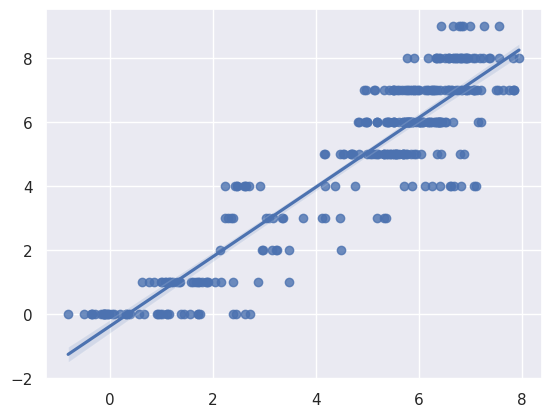

In [13]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

sns.regplot(x=test_preds, y=test_flower_counts)
plt.show()

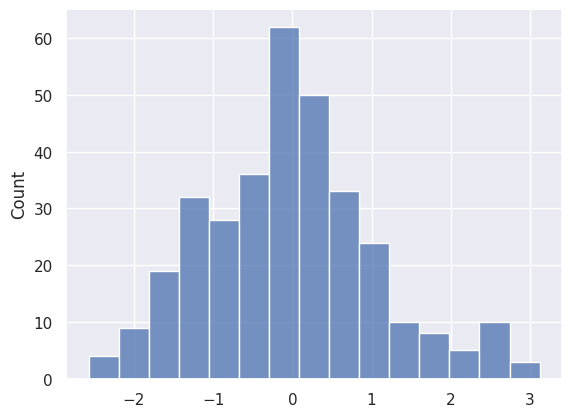

In [14]:
sns.histplot(x=errors)